In [28]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [50]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Kino1.txt', sep='\s+')
# "Shift + Enter"

In [51]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD
0,27/01/2019,20:00,243.0,243.0,22.02,32.8,22.4,41.0,1015.5,0.0,761.0
1,27/01/2019,21:00,237.0,240.0,19.85,28.4,22.9,40.0,1014.5,0.0,670.5
2,27/01/2019,22:00,252.0,260.0,19.37,29.9,23.7,34.0,1014.0,0.0,526.8
3,27/01/2019,23:00,265.0,265.0,21.78,36.7,24.0,22.0,1013.7,0.0,341.0
4,28/01/2019,00:00,263.0,273.0,20.03,31.3,22.2,22.0,1013.7,0.0,117.7


In [52]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [53]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RAD           float64
dtype: object

In [54]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [55]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD,FECHA
0,243.0,243.0,22.02,32.8,22.4,41.0,1015.5,0.0,761.0,2019-01-27 20:00:00
1,237.0,240.0,19.85,28.4,22.9,40.0,1014.5,0.0,670.5,2019-01-27 21:00:00
2,252.0,260.0,19.37,29.9,23.7,34.0,1014.0,0.0,526.8,2019-01-27 22:00:00
3,265.0,265.0,21.78,36.7,24.0,22.0,1013.7,0.0,341.0,2019-01-27 23:00:00
4,263.0,273.0,20.03,31.3,22.2,22.0,1013.7,0.0,117.7,2019-01-28 00:00:00


In [56]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD
count,107.000000,107.000000,107.000000,106.000000,106.000000,106.000000,106.000000,105.0,105.000000
mean,193.869159,199.177944,8.708692,17.663208,24.921698,68.141509,1003.367925,0.0,181.470476
std,97.702000,137.160114,5.459854,10.382186,97.084200,22.961848,98.490724,0.0,258.313304
min,11.000000,1.000000,-1.000000,6.100000,5.500000,0.000000,-1.000000,0.0,-1.000000
25%,124.000000,103.500000,4.345000,11.675000,12.025000,54.250000,1011.925000,0.0,-1.000000
50%,189.000000,188.000000,7.850000,15.650000,16.100000,69.000000,1013.050000,0.0,0.000000
75%,267.000000,288.500000,11.515000,19.800000,18.775000,90.750000,1013.775000,0.0,352.800000
max,350.000000,1013.800000,23.460000,95.000000,1014.100000,98.000000,1016.300000,0.0,761.000000


In [57]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 23] 
df_select = df_tmp[df_tmp.TEMP < 24]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD,FECHA
2,252.0,260.0,19.37,29.9,23.7,34.0,1014.0,0.0,526.8,2019-01-27 22:00:00
26,249.0,255.0,23.39,39.6,23.3,28.0,1011.9,0.0,440.3,2019-01-28 22:00:00
27,249.0,253.0,23.46,36.4,23.3,26.0,1011.7,0.0,352.8,2019-01-28 23:00:00


In [58]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS     193.869159
DIRR     199.177944
VELS       8.708692
VELR      17.663208
TEMP      24.921698
HR        68.141509
PB      1003.367925
PREC       0.000000
RAD      181.470476
dtype: float64

In [59]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

24.921698113207544

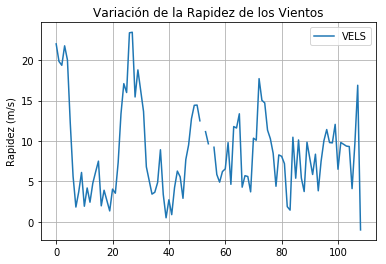

In [60]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

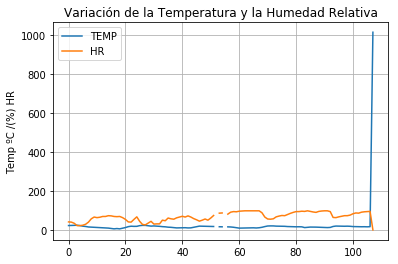

In [61]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

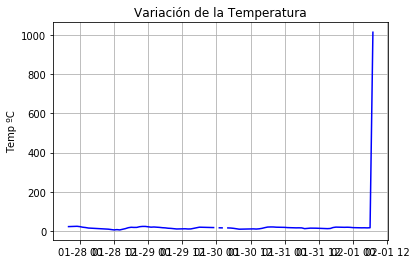

In [62]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

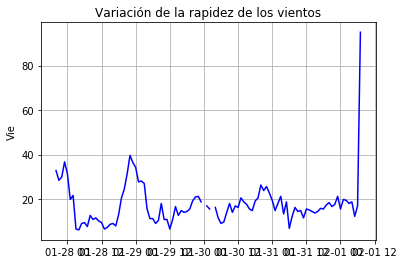

In [63]:
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="b-")
plt.title("Variación de la rapidez de los vientos")
plt.ylabel("Vie")
plt.grid(True)
plt.show()

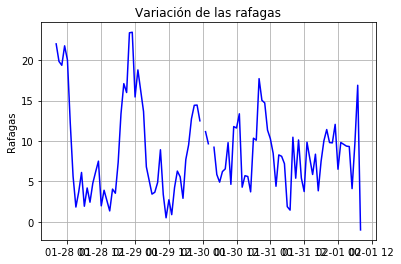

In [64]:
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.title("Variación de las rafagas")
plt.ylabel("Rafagas")
plt.grid(True)
plt.show()

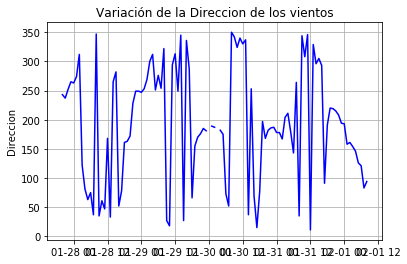

In [65]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Variación de la Direccion de los vientos")
plt.ylabel("Direccion")
plt.grid(True)
plt.show()

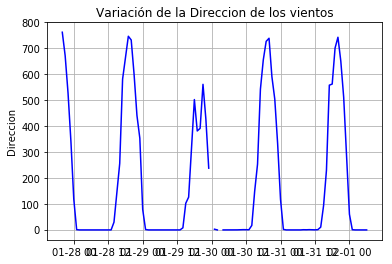

In [66]:
plt.plot_date(x=df.FECHA, y=df.RAD, fmt="b-")
plt.title("Variación de la Direccion de los vientos")
plt.ylabel("Direccion")
plt.grid(True)
plt.show()

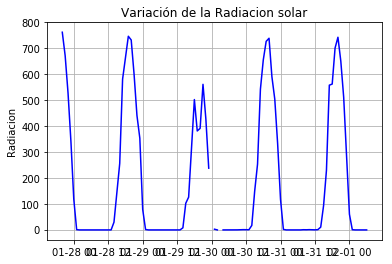

In [68]:
plt.plot_date(x=df.FECHA, y=df.RAD, fmt="b-")
plt.title("Variación de la Radiacion solar")
plt.ylabel("Radiacion")
plt.grid(True)
plt.show()